In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


挑出要觀察的欄位

In [4]:
sub_train = app_train.loc[:, ["NAME_CONTRACT_TYPE", "AMT_INCOME_TOTAL"]]
sub_train.head()

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL
0,Cash loans,202500.0
1,Cash loans,270000.0
2,Revolving loans,67500.0
3,Cash loans,135000.0
4,Cash loans,121500.0


兩組類別之個數

In [5]:
pd.value_counts(sub_train.NAME_CONTRACT_TYPE)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

AMT_INCOME_TOTAL的描述性統計量

In [6]:
sub_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

兩組個別的AMT_INCOME_TOTAL之描述性統計量

In [7]:
sub_train.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,278232.0,169069.513575,245910.950896,25650.0,112500.0,153000.0,202500.0,117000000.0
Revolving loans,29279.0,166217.017656,126028.600660,27000.0,99000.0,135000.0,202500.0,4500000.0


很明顯可看出Cash loans組，有離群值需處理

利用直方圖觀察AMT_INCOME_TOTAL的資料狀況

In [8]:
bin_list = []
for i in range(101):
    bin_list.append(i*10000)

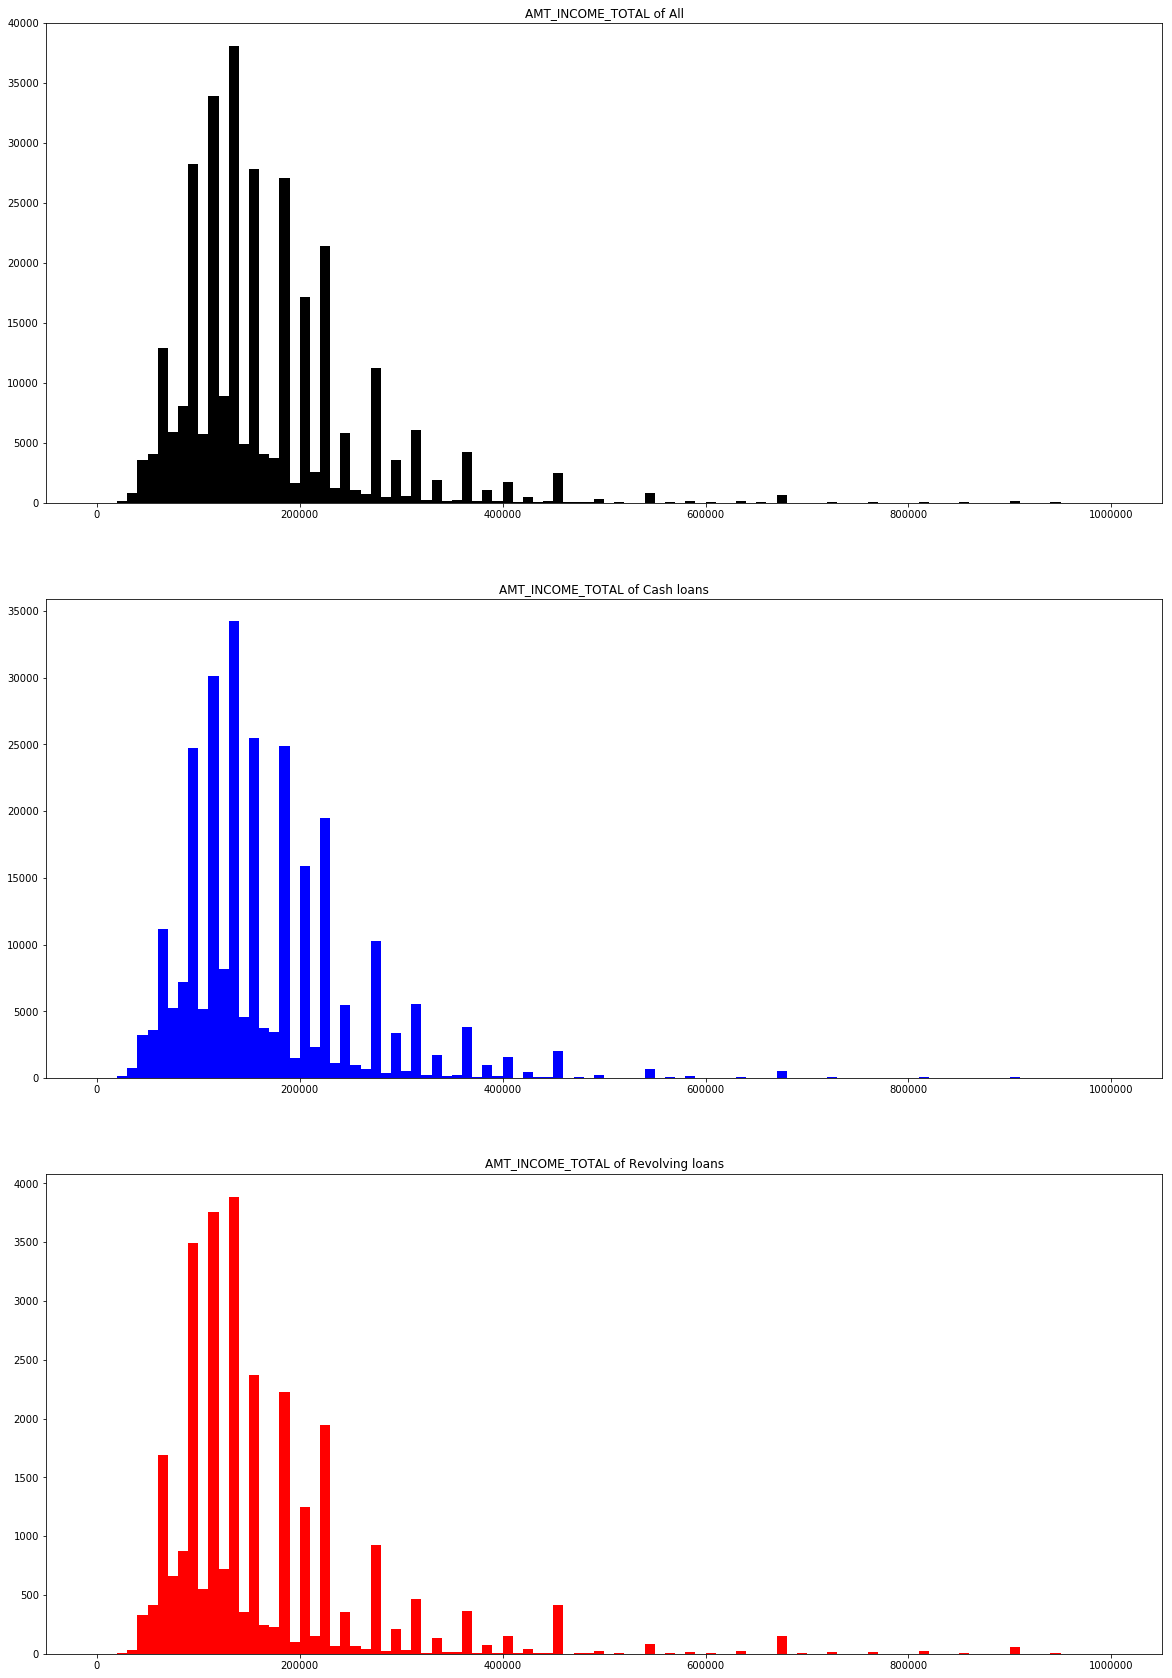

In [9]:
plt.figure(figsize=(20, 30))
plt.subplot(311)
plt.hist(sub_train["AMT_INCOME_TOTAL"], bins = bin_list, color = "black")
#plt.ylim(0, 40000)
plt.title("AMT_INCOME_TOTAL of All")
plt.subplot(312)
plt.hist(sub_train[sub_train.NAME_CONTRACT_TYPE == "Cash loans"]["AMT_INCOME_TOTAL"], bins = bin_list, color = "blue") 
#plt.ylim(0, 40000)
plt.title("AMT_INCOME_TOTAL of Cash loans")
plt.subplot(313)
plt.hist(sub_train[sub_train.NAME_CONTRACT_TYPE == "Revolving loans"]["AMT_INCOME_TOTAL"], bins = bin_list, color = "red") 
#plt.ylim(0, 40000)
plt.title("AMT_INCOME_TOTAL of Revolving loans")
plt.show()

全部和兩組的資料分佈狀況類似，皆集中在150000左右